In [64]:
import numpy as np
import pandas as pd
import folium
import datetime as dt
import matplotlib.pyplot as plt
from geopy.distance import geodesic

In [65]:
names = ['time', 'lat', 'lon']
bus = pd.read_csv("GPSDataclean.csv",header=None, names=names,low_memory=False, usecols=[0,2,3])
bus = bus.drop(bus.index[0])
bus = bus.dropna()
bus = bus.reset_index(drop=True)
len(bus),print(bus.dtypes)

time    object
lat     object
lon     object
dtype: object


(296933, None)

In [66]:
bus[bus['lat'].str.contains(':', na=False)]

,time,lat,lon
105482,2022/1/26 19:25,17:10.3,0
134647,2022/2/17 6:57,17:10.5,0
156215,2022/2/5 16:13,00:24.4,0
211749,2022/4/12 9:22,17:09.7,0


In [67]:
drop_index = bus.index[bus['lat'].str.contains(':', na=False)]
bus = bus.drop(drop_index)

In [68]:
bus[bus['lat'].str.contains(':', na=False)]

,time,lat,lon


In [69]:
bus = bus.astype({'lat': float, 'lon': float})
bus['time'] = pd.to_datetime(bus['time'])
bus.dtypes

time    datetime64[ns]
lat            float64
lon            float64
dtype: object

In [70]:
bus[(bus['lat']<40) | (bus['lat']>41)]

,time,lat,lon
34863,2021-07-12 16:36:00,140.473095,34.312500
34864,2021-07-12 16:36:00,140.473110,34.312500
34865,2021-07-12 16:57:00,140.473107,35.062500
34866,2021-07-12 16:57:00,140.473108,35.125000
34867,2021-07-12 17:06:00,140.473125,35.250000
34868,2021-07-12 17:06:00,140.473145,35.312500
41595,2021-07-24 14:25:00,4.560170,140.491220
54422,2021-08-01 14:44:00,0.593123,100.473338
54423,2021-08-01 14:44:00,0.593123,100.473338
54424,2021-08-01 14:44:00,0.593123,100.473338


In [71]:
bus = bus.drop(bus.index[(bus['lat']<40) | (bus['lat']>41)])

In [72]:
bus[(bus['lat']<40) | (bus['lat']>41)]

,time,lat,lon


In [73]:
bus[(bus['lon']<140) | (bus['lon']>141)]

,time,lat,lon
45583,2021-07-26 12:26:00,40.639712,14.239802
45584,2021-07-26 12:26:00,40.639712,14.239802
47537,2021-07-27 11:11:00,40.582870,40.482290
54037,2021-07-31 07:43:00,40.560008,14.491540
54038,2021-07-31 07:43:00,40.560008,14.491540
...,...,...,...
74013,2021-09-06 08:28:00,40.598577,14.484697
74014,2021-09-06 08:28:00,40.598577,14.484697
74015,2021-09-06 08:28:00,40.598577,14.484697
74016,2021-09-06 08:28:00,40.598577,14.484697


In [74]:
bus = bus.drop(bus.index[(bus['lon']<140) | (bus['lon']>141)])

In [75]:
bus[(bus['lon']<140) | (bus['lon']>141)]

,time,lat,lon


In [76]:
bus

,time,lat,lon
0,2020-06-26 10:40:00,40.584520,140.474995
1,2020-08-10 15:50:00,40.560105,140.491400
2,2020-08-10 15:50:00,40.560105,140.491400
3,2020-08-10 15:50:00,40.560105,140.491400
4,2020-08-10 15:50:00,40.560105,140.491400
...,...,...,...
296928,2022-06-09 08:58:00,40.577988,140.507428
296929,2022-06-09 08:58:00,40.578180,140.505515
296930,2022-06-09 08:59:00,40.576530,140.512003
296931,2022-06-09 08:59:00,40.577368,140.510172


In [77]:
names = ['time', 'lat', 'lon']
bus_clean = pd.read_csv("bus_clean.csv",header=None, names=names,low_memory=False, usecols=[1,2,3])
bus_clean = bus_clean.drop(bus_clean.index[0])
bus_clean = bus_clean.reset_index(drop=True)
len(bus_clean),print(bus_clean.dtypes)

time    object
lat     object
lon     object
dtype: object


(296794, None)

In [78]:
bus_clean = bus_clean.astype({'lat': float, 'lon': float})
bus_clean['time'] = pd.to_datetime(bus_clean['time'])
bus_clean.dtypes

time    datetime64[ns]
lat            float64
lon            float64
dtype: object

In [79]:
bus_clean

,time,lat,lon
0,2020-08-10 15:50:00,40.560105,140.491400
1,2020-08-10 15:50:00,40.560105,140.491400
2,2020-08-10 15:50:00,40.560105,140.491400
3,2020-08-10 15:50:00,40.560105,140.491400
4,2020-08-10 15:50:00,40.560105,140.491400
...,...,...,...
296789,2022-06-15 09:25:00,40.560497,140.490653
296790,2022-06-15 09:25:00,40.560502,140.490633
296791,2022-06-15 09:25:00,40.560502,140.490610
296792,2022-06-15 09:25:00,40.560463,140.490583


In [80]:
bus_clean[bus_clean['time']>dt.datetime(2022,6,10)]

,time,lat,lon
288518,2022-06-10 06:05:00,40.560310,140.491978
288519,2022-06-10 06:06:00,40.560113,140.491412
288520,2022-06-10 06:06:00,40.560107,140.491338
288521,2022-06-10 06:06:00,40.560127,140.491327
288522,2022-06-10 06:07:00,40.560140,140.491338
...,...,...,...
296789,2022-06-15 09:25:00,40.560497,140.490653
296790,2022-06-15 09:25:00,40.560502,140.490633
296791,2022-06-15 09:25:00,40.560502,140.490610
296792,2022-06-15 09:25:00,40.560463,140.490583


In [81]:
bus2=bus_clean[(bus_clean['time'] >= dt.datetime(2022,2,25)) & (bus_clean['time'] < dt.datetime(2022,2,26))]
print(bus2.dtypes)
print(type(bus2))

time    datetime64[ns]
lat            float64
lon            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>


In [82]:
bus2

,time,lat,lon
156334,2022-02-25 07:16:00,40.560300,140.491233
156335,2022-02-25 07:16:00,40.560215,140.491193
156336,2022-02-25 07:16:00,40.560218,140.491163
156337,2022-02-25 07:16:00,40.560240,140.491162
156338,2022-02-25 07:17:00,40.560298,140.491178
...,...,...,...
158009,2022-02-25 19:29:00,40.560357,140.491102
158010,2022-02-25 19:29:00,40.560365,140.491098
158011,2022-02-25 19:29:00,40.560358,140.491095
158012,2022-02-25 19:30:00,40.560375,140.491122


In [83]:
bus_clean.to_csv("bus_clean.csv")

In [84]:
bus_40=bus_clean[(bus_clean["lat"] >= 40.520) & (bus_clean['lat'] < 40.522)]
bus_40 = bus_40.reset_index(drop=True)
bus_40

,time,lat,lon
0,2021-07-21 17:36:00,40.521290,140.563887
1,2021-07-21 17:36:00,40.521305,140.563883
2,2021-07-21 17:36:00,40.521727,140.563743
3,2021-07-21 17:37:00,40.521205,140.566860
4,2021-07-21 17:37:00,40.521020,140.565460
...,...,...,...
2427,2022-05-24 15:43:00,40.520385,140.586277
2428,2022-05-24 15:43:00,40.520688,140.584277
2429,2022-05-24 15:43:00,40.520703,140.583947
2430,2022-05-24 15:43:00,40.520700,140.583932


In [85]:
bus_140=bus_40[(bus_40["lon"] >= 140.566) & (bus_40['lon'] < 140.568)]
bus_140 = bus_140.reset_index(drop=True)
bus_140

,time,lat,lon
0,2021-07-21 17:37:00,40.521205,140.566860
1,2021-07-21 17:38:00,40.521237,140.567828
2,2021-07-21 17:38:00,40.521225,140.567400
3,2021-07-21 17:38:00,40.521227,140.567397
4,2021-08-03 17:33:00,40.521130,140.567027
...,...,...,...
250,2022-05-02 17:42:00,40.521113,140.567420
251,2022-05-02 17:42:00,40.521102,140.566793
252,2022-05-24 15:38:00,40.521172,140.567770
253,2022-05-24 15:38:00,40.521182,140.567630


In [86]:
bus_140.to_csv("bus140.csv")

In [87]:
bus225=bus_140[(bus_140['time'] >= dt.datetime(2022,2,25)) & (bus_140['time'] < dt.datetime(2022,2,25))]
print(bus225.dtypes)
print(type(bus225))

time    datetime64[ns]
lat            float64
lon            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>


In [88]:
bus225

,time,lat,lon


In [89]:
bus_140['time'].dt.round('D').unique()

array(['2021-07-22T00:00:00.000000000', '2021-08-04T00:00:00.000000000',
       '2021-08-06T00:00:00.000000000', '2021-08-07T00:00:00.000000000',
       '2021-12-10T00:00:00.000000000', '2021-12-11T00:00:00.000000000',
       '2021-12-13T00:00:00.000000000', '2021-12-14T00:00:00.000000000',
       '2021-12-15T00:00:00.000000000', '2021-12-16T00:00:00.000000000',
       '2021-12-17T00:00:00.000000000', '2021-12-18T00:00:00.000000000',
       '2021-12-21T00:00:00.000000000', '2021-12-22T00:00:00.000000000',
       '2021-12-23T00:00:00.000000000', '2021-12-31T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000', '2022-01-05T00:00:00.000000000',
       '2022-01-06T00:00:00.000000000', '2022-01-12T00:00:00.000000000',
       '2022-01-13T00:00:00.000000000', '2022-01-18T00:00:00.000000000',
       '2022-01-20T00:00:00.000000000', '2022-01-26T00:00:00.000000000',
       '2022-01-28T00:00:00.000000000', '2022-01-31T00:00:00.000000000',
       '2022-02-02T00:00:00.000000000', '2022-02-04

In [90]:
bus_140['time'].dt.floor('D').unique()

array(['2021-07-21T00:00:00.000000000', '2021-08-03T00:00:00.000000000',
       '2021-08-05T00:00:00.000000000', '2021-08-06T00:00:00.000000000',
       '2021-12-09T00:00:00.000000000', '2021-12-11T00:00:00.000000000',
       '2021-12-13T00:00:00.000000000', '2021-12-14T00:00:00.000000000',
       '2021-12-15T00:00:00.000000000', '2021-12-16T00:00:00.000000000',
       '2021-12-17T00:00:00.000000000', '2021-12-18T00:00:00.000000000',
       '2021-12-21T00:00:00.000000000', '2021-12-23T00:00:00.000000000',
       '2021-12-31T00:00:00.000000000', '2022-01-04T00:00:00.000000000',
       '2022-01-06T00:00:00.000000000', '2022-01-12T00:00:00.000000000',
       '2022-01-18T00:00:00.000000000', '2022-01-20T00:00:00.000000000',
       '2022-01-26T00:00:00.000000000', '2022-01-28T00:00:00.000000000',
       '2022-01-31T00:00:00.000000000', '2022-02-02T00:00:00.000000000',
       '2022-02-04T00:00:00.000000000', '2022-02-08T00:00:00.000000000',
       '2022-02-09T00:00:00.000000000', '2022-02-10

In [91]:
bus_140['time'].dt.ceil('D').unique()

array(['2021-07-22T00:00:00.000000000', '2021-08-04T00:00:00.000000000',
       '2021-08-06T00:00:00.000000000', '2021-08-07T00:00:00.000000000',
       '2021-12-10T00:00:00.000000000', '2021-12-12T00:00:00.000000000',
       '2021-12-14T00:00:00.000000000', '2021-12-15T00:00:00.000000000',
       '2021-12-16T00:00:00.000000000', '2021-12-17T00:00:00.000000000',
       '2021-12-18T00:00:00.000000000', '2021-12-19T00:00:00.000000000',
       '2021-12-22T00:00:00.000000000', '2021-12-24T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000', '2022-01-05T00:00:00.000000000',
       '2022-01-07T00:00:00.000000000', '2022-01-13T00:00:00.000000000',
       '2022-01-19T00:00:00.000000000', '2022-01-21T00:00:00.000000000',
       '2022-01-27T00:00:00.000000000', '2022-01-29T00:00:00.000000000',
       '2022-02-01T00:00:00.000000000', '2022-02-03T00:00:00.000000000',
       '2022-02-05T00:00:00.000000000', '2022-02-09T00:00:00.000000000',
       '2022-02-10T00:00:00.000000000', '2022-02-11

In [92]:
bus_140['time'].dt.round('D').value_counts()

2022-02-25    13
2021-12-16     8
2022-01-06     8
2022-02-04     8
2022-02-10     8
2022-03-18     8
2022-01-20     8
2022-03-09     7
2022-03-22     7
2022-02-09     7
2021-12-15     7
2022-03-31     7
2022-02-16     7
2022-01-05     7
2022-03-04     6
2022-01-28     6
2022-03-14     6
2022-01-26     5
2021-12-23     5
2022-03-16     5
2022-03-25     5
2022-04-02     5
2022-05-03     5
2021-08-07     5
2021-08-06     5
2022-02-15     5
2022-03-03     4
2022-05-02     4
2022-02-18     4
2021-07-22     4
2022-05-25     3
2022-01-18     3
2022-02-08     3
2022-03-15     3
2021-12-31     3
2022-04-28     3
2021-12-11     3
2022-01-12     3
2022-02-20     3
2022-01-31     3
2022-02-17     3
2022-02-02     3
2022-03-24     3
2021-12-10     2
2022-03-26     2
2021-12-13     2
2021-12-14     2
2022-03-29     2
2022-03-28     2
2021-08-04     2
2021-12-17     2
2022-03-23     2
2021-12-21     2
2022-01-01     2
2021-12-18     1
2022-03-07     1
2022-01-13     1
2022-02-21     1
2021-12-22    

In [93]:
len(bus_140['time'].dt.round('D').value_counts())

59

In [94]:
bus_140[bus_140['time'].dt.round('D')=='2021-12-21']

,time,lat,lon
43,2021-12-21 09:36:00,40.521168,140.567452
44,2021-12-21 09:36:00,40.521172,140.567383


In [95]:
bus_140[bus_140['time'].dt.round('D')=='2021-12-13']

,time,lat,lon
21,2021-12-13 08:34:00,40.521263,140.567950
22,2021-12-13 08:34:00,40.521135,140.566757


In [96]:
bus_140[bus_140['time'].dt.round('D')=='2021-12-14']

,time,lat,lon
23,2021-12-14 08:33:00,40.521085,140.56662
24,2021-12-14 08:34:00,40.521230,140.56793


In [97]:
bus_140[bus_140['time'].dt.floor('D')=='2021-12-21']

,time,lat,lon
43,2021-12-21 09:36:00,40.521168,140.567452
44,2021-12-21 09:36:00,40.521172,140.567383
45,2021-12-21 19:04:00,40.521183,140.567235


In [98]:
bus_140[bus_140['time'].dt.floor('D')=='2022-2-24']

,time,lat,lon
152,2022-02-24 16:37:00,40.521153,140.566822
153,2022-02-24 16:38:00,40.521150,140.567393
154,2022-02-24 16:38:00,40.521150,140.567393
155,2022-02-24 17:43:00,40.521168,140.567558
156,2022-02-24 17:43:00,40.521155,140.567198
157,2022-02-24 17:43:00,40.521115,140.566475


In [99]:
bus_140[bus_140['time'].dt.ceil('D')=='2022-2-25']

,time,lat,lon
152,2022-02-24 16:37:00,40.521153,140.566822
153,2022-02-24 16:38:00,40.521150,140.567393
154,2022-02-24 16:38:00,40.521150,140.567393
155,2022-02-24 17:43:00,40.521168,140.567558
156,2022-02-24 17:43:00,40.521155,140.567198
157,2022-02-24 17:43:00,40.521115,140.566475


In [100]:
bus_140['time'].dt.round('H').unique()

array(['2021-07-21T18:00:00.000000000', '2021-08-03T18:00:00.000000000',
       '2021-08-05T18:00:00.000000000', '2021-08-06T18:00:00.000000000',
       '2021-12-09T20:00:00.000000000', '2021-12-11T10:00:00.000000000',
       '2021-12-11T11:00:00.000000000', '2021-12-13T09:00:00.000000000',
       '2021-12-14T09:00:00.000000000', '2021-12-14T20:00:00.000000000',
       '2021-12-15T10:00:00.000000000', '2021-12-16T11:00:00.000000000',
       '2021-12-16T12:00:00.000000000', '2021-12-17T07:00:00.000000000',
       '2021-12-18T07:00:00.000000000', '2021-12-21T10:00:00.000000000',
       '2021-12-21T19:00:00.000000000', '2021-12-23T11:00:00.000000000',
       '2021-12-23T12:00:00.000000000', '2021-12-31T10:00:00.000000000',
       '2021-12-31T11:00:00.000000000', '2021-12-31T19:00:00.000000000',
       '2021-12-31T20:00:00.000000000', '2022-01-04T14:00:00.000000000',
       '2022-01-04T15:00:00.000000000', '2022-01-06T11:00:00.000000000',
       '2022-01-06T12:00:00.000000000', '2022-01-12

In [101]:
bus_140[bus_140['time'].dt.round('h')=='2022-2-25-11']

,time,lat,lon
158,2022-02-25 10:36:00,40.521205,140.567458
159,2022-02-25 10:36:00,40.521197,140.567450
160,2022-02-25 10:37:00,40.521342,140.567983


In [102]:
len(bus_140['time'].dt.round('h').value_counts())

96

In [103]:
#地図を用意
map1 = folium.Map(
   #初期位置の設定
   location=[40.520858515863786, 140.56816999491957 ],
   #初期表示の拡大具合の設定
   zoom_start = 15,

   #地図のスタイルの選択 どれか一つ選んで#をはずしてください
   tiles = "OpenStreetMap"
   #tiles="cartodbpositron"
   #tiles = "Stamen Toner"
   #tiles = "Stamen Terrain"
)

In [104]:
stops = pd.read_csv("oowani_stop.csv",usecols=[2,4,5])
stops.iloc[0,1]=40.5984936439
stops.iloc[0,2]=140.484333099
stops.iloc[1,1]=40.6000875
stops.iloc[1,2]=140.480910833333
stops = stops.dropna(subset=['stop_lat', 'stop_lon'])
len(stops)

44

In [105]:
stops.head(47)

,stop_name,stop_lat,stop_lon
0,弘前ﾊﾞｽﾀｰﾐﾅﾙ前,40.598494,140.484333
1,弘前駅前,40.600088,140.480911
2,上代官町,40.598536,140.476086
3,上土手町,40.596157,140.477692
4,中央松森町,40.591484,140.481957
5,松森町角,40.588628,140.484458
6,取上,40.585583,140.487824
7,大清水,40.581048,140.494099
8,大清水局前,40.579968,140.496199
9,門外十文字,40.579040,140.499638


In [106]:
bus_225 = bus_clean[bus_clean['time'].dt.floor('D') == '2022-2-25']
bus_225 = bus_225.reset_index(drop=True)
bus_225

,time,lat,lon
0,2022-02-25 07:16:00,40.560300,140.491233
1,2022-02-25 07:16:00,40.560215,140.491193
2,2022-02-25 07:16:00,40.560218,140.491163
3,2022-02-25 07:16:00,40.560240,140.491162
4,2022-02-25 07:17:00,40.560298,140.491178
...,...,...,...
1675,2022-02-25 19:29:00,40.560357,140.491102
1676,2022-02-25 19:29:00,40.560365,140.491098
1677,2022-02-25 19:29:00,40.560358,140.491095
1678,2022-02-25 19:30:00,40.560375,140.491122


In [107]:
route = pd.read_csv('route_oowani.csv')

In [108]:
route=route.drop(route.columns[0],axis=1)

In [109]:
route

,longitude,latitude
0,40.599459,140.483468
1,40.599522,140.483384
2,40.599585,140.483300
3,40.599648,140.483216
4,40.599711,140.483132
...,...,...
2580,40.442950,140.635035
2581,40.442862,140.635057
2582,40.442773,140.635079
2583,40.442685,140.635101


In [110]:
route.iloc[1,1]

140.48338413115275

In [111]:
dis_scale = 84.78234392637954

In [112]:
route = route.values.tolist()

In [113]:
def xy2no(xy):
  distances=np.sqrt(np.sum((xy-route)**2,axis=1))*dis_scale
  xy2r_max=np.amin(distances)
  if xy2r_max>0.1:
    no=-1
  else:  
    no=np.argmin(distances)
  return no

In [114]:
I=len(bus_225)
nos=[]
for i in range(0,I):
  nos.append(xy2no(np.array([bus_225.iloc[i,1],bus_225.iloc[i,2]])))

In [115]:
nos

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 80,
 80,
 -1,
 70,
 80,
 80,
 80,
 46,
 56,
 45,
 46,
 46,
 30,
 30,
 35,
 45,
 10,
 13,
 17,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -

In [116]:
nos_df = pd.DataFrame({'nos':nos})
print(nos_df)
print(type(nos_df))

      nos
0      -1
1      -1
2      -1
3      -1
4      -1
...   ...
1675   -1
1676   -1
1677   -1
1678   -1
1679   -1

[1680 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [117]:
bus_225 = pd.concat([bus_225, nos_df], axis=1)
bus_225

,time,lat,lon,nos
0,2022-02-25 07:16:00,40.560300,140.491233,-1
1,2022-02-25 07:16:00,40.560215,140.491193,-1
2,2022-02-25 07:16:00,40.560218,140.491163,-1
3,2022-02-25 07:16:00,40.560240,140.491162,-1
4,2022-02-25 07:17:00,40.560298,140.491178,-1
...,...,...,...,...
1675,2022-02-25 19:29:00,40.560357,140.491102,-1
1676,2022-02-25 19:29:00,40.560365,140.491098,-1
1677,2022-02-25 19:29:00,40.560358,140.491095,-1
1678,2022-02-25 19:30:00,40.560375,140.491122,-1


In [118]:
bus_225 = bus_225[(bus_225['nos']>=0)]
bus_225

,time,lat,lon,nos
148,2022-02-25 07:58:00,40.598213,140.475245,80
149,2022-02-25 07:58:00,40.597940,140.474710,80
151,2022-02-25 07:59:00,40.598930,140.476685,70
152,2022-02-25 07:59:00,40.598363,140.475537,80
153,2022-02-25 07:59:00,40.598233,140.475280,80
...,...,...,...,...
1592,2022-02-25 19:05:00,40.598040,140.474912,80
1593,2022-02-25 19:05:00,40.598038,140.474908,80
1594,2022-02-25 19:06:00,40.598020,140.474915,80
1595,2022-02-25 19:06:00,40.598030,140.474915,80


In [119]:
bus_225[bus_225['nos']==-1]

,time,lat,lon,nos


In [120]:
for i in range(len(bus_225)):
    folium.Circle(
        radius=1,
        location=[bus_225.iloc[i]['lat'], bus_225.iloc[i]['lon']],
        #ドットの外枠の色を指定します
        color="red",
    ).add_to(map1)

map1

In [121]:
bus225 = pd.DataFrame(bus_225,
  columns=['time','lat','lon','nos'
])
bus225

,time,lat,lon,nos
148,2022-02-25 07:58:00,40.598213,140.475245,80
149,2022-02-25 07:58:00,40.597940,140.474710,80
151,2022-02-25 07:59:00,40.598930,140.476685,70
152,2022-02-25 07:59:00,40.598363,140.475537,80
153,2022-02-25 07:59:00,40.598233,140.475280,80
...,...,...,...,...
1592,2022-02-25 19:05:00,40.598040,140.474912,80
1593,2022-02-25 19:05:00,40.598038,140.474908,80
1594,2022-02-25 19:06:00,40.598020,140.474915,80
1595,2022-02-25 19:06:00,40.598030,140.474915,80


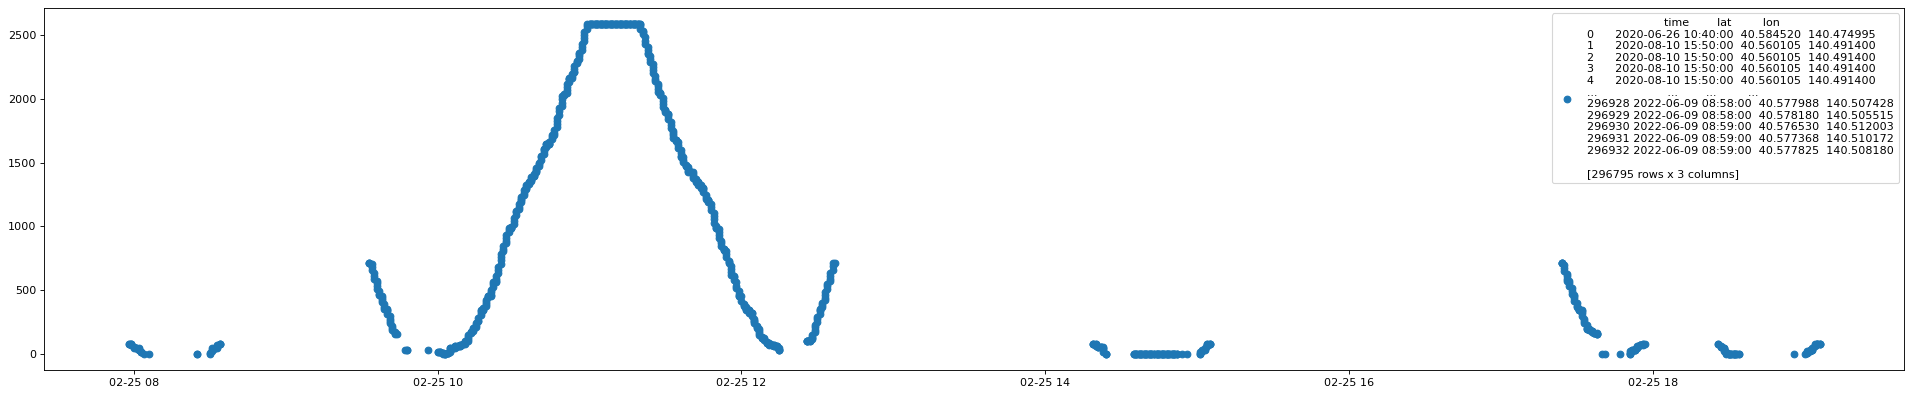

In [127]:
plt.figure(figsize=(30, 6), dpi=80)

plt.scatter(bus225['time'], bus225['nos'],label=bus)

plt.legend(loc='upper right',fontsize=10)
plt.show()

In [129]:
bus_28 = bus_clean[bus_clean['time'].dt.floor('D') == '2022-2-8']
bus_28.to_csv("bus28.csv")